In [1]:
import pandas as pd 
import numpy as np 
from sklearn import linear_model 
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.data.shape

(506L, 13L)

In [4]:
df_x=pd.DataFrame(boston.data,columns=boston.feature_names)
df_x.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [5]:
df_x["price"]=boston.target
df_x.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [6]:
df_y=pd.DataFrame(boston.target)
#df_y.describe()
df_y.head(15)


,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [7]:
reg = linear_model.LinearRegression()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=4)

In [9]:
x_train.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
169,2.44953,0.0,19.58,0.0,0.605,6.402,95.2,2.2625,5.0,403.0,14.7,330.04,11.32,22.3
402,9.59571,0.0,18.10,0.0,0.693,6.404,100.0,1.6390,24.0,666.0,20.2,376.11,20.31,12.1
295,0.12932,0.0,13.92,0.0,0.437,6.678,31.1,5.9604,4.0,289.0,16.0,396.90,6.27,28.6
134,0.97617,0.0,21.89,0.0,0.624,5.757,98.4,2.3460,4.0,437.0,21.2,262.76,17.31,15.6
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30,19.2


In [10]:
y_train.head()


,0
169,22.3
402,12.1
295,28.6
134,15.6
117,19.2


In [11]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
df_x.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT', u'price'],
      dtype='object')

In [13]:
reg.coef_

array([[ -1.79408813e-16,   3.81639165e-16,   3.33066907e-16,
         -7.79931675e-15,  -2.02615702e-15,   5.55111512e-16,
         -1.11022302e-16,  -8.88178420e-16,   5.55111512e-16,
         -1.94289029e-16,  -3.92047506e-16,  -2.53269627e-16,
         -3.33066907e-16,   1.00000000e+00]])

In [14]:
reg.coef_

array([[ -1.79408813e-16,   3.81639165e-16,   3.33066907e-16,
         -7.79931675e-15,  -2.02615702e-15,   5.55111512e-16,
         -1.11022302e-16,  -8.88178420e-16,   5.55111512e-16,
         -1.94289029e-16,  -3.92047506e-16,  -2.53269627e-16,
         -3.33066907e-16,   1.00000000e+00]])

In [15]:
reg.predict(x_test)

array([[ 16.5],
       [ 24.8],
       [ 17.4],
       [ 19.3],
       [ 37.6],
       [ 24.2],
       [ 35.4],
       [ 19.9],
       [ 27.5],
       [ 17. ],
       [ 31.2],
       [ 24.4],
       [ 16.1],
       [ 27. ],
       [ 21. ],
       [ 14.9],
       [ 18.9],
       [  6.3],
       [ 16.3],
       [ 13.9],
       [  8.8],
       [ 19.4],
       [ 18.8],
       [ 19.8],
       [ 17.5],
       [ 19.3],
       [ 20. ],
       [ 14.3],
       [ 16.1],
       [ 19.5],
       [ 11. ],
       [ 21.9],
       [ 31. ],
       [ 22. ],
       [ 15.1],
       [ 13.3],
       [ 28.7],
       [ 46.7],
       [ 22.2],
       [ 22.8],
       [ 42.3],
       [ 41.3],
       [ 16.7],
       [ 31.1],
       [ 26.7],
       [ 19.4],
       [ 50. ],
       [ 16.6],
       [ 19.5],
       [ 24.4],
       [ 28.5]])

In [16]:
np.mean((reg.predict(x_test) - y_test)**2)



0    8.240658e-28
dtype: float64

In [17]:
a = reg.predict(x_test)
#len(a)
y_test

,0
8,16.5
289,24.8
68,17.4
211,19.3
226,37.6
70,24.2
55,35.4
470,19.9
409,27.5
154,17.0


In [18]:
a[10]

array([ 31.2])

In [19]:
#aa = x_test['AGE']
#aa = np.sort(aa)
#aa

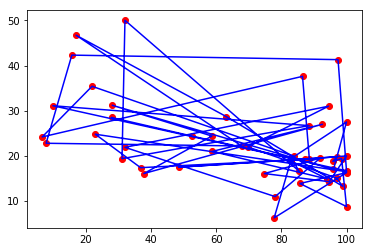

In [20]:
plt.scatter(x_test['AGE'], y_test, color = 'red')
plt.plot(x_test['AGE'], reg.predict(x_test), color = 'blue')
plt.show()


In [21]:
x_train['price'].head(10)

169    22.3
402    12.1
295    28.6
134    15.6
117    19.2
100    27.5
275    32.0
18     20.2
274    32.4
133    18.4
Name: price, dtype: float64

In [35]:
y_train.head(20)

,0
169,22.3
402,12.1
295,28.6
134,15.6
117,19.2
100,27.5
275,32.0
18,20.2
274,32.4
133,18.4


In [37]:
#### Debashish test for NORMAL EQUATIONS to find out Theta/coefficients to minimize the aggregate Cost-function values
ss = x_test.head(20)
len(ss)

20

In [45]:
ss.shape
cols = ss.shape[1]
#ss.columns
cols
#ss

14

In [46]:
X_inputs = ss.iloc[:,0:cols-1] 
X_inputs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
289,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,6.0,293.0,16.6,371.72,9.51
68,0.13554,12.5,6.07,0.0,0.409,5.594,36.8,6.4980,4.0,345.0,18.9,396.90,13.09
211,0.37578,0.0,10.59,1.0,0.489,5.404,88.6,3.6650,4.0,277.0,18.6,395.24,23.98
226,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13
70,0.08826,0.0,10.81,0.0,0.413,6.417,6.6,5.2873,4.0,305.0,19.2,383.73,6.72
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81
470,4.34879,0.0,18.10,0.0,0.580,6.167,84.0,3.0334,24.0,666.0,20.2,396.90,16.29
409,14.43830,0.0,18.10,0.0,0.597,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78
154,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12


In [56]:
y_results = ss.iloc[:,cols-1:cols]
y_results

,price
8,16.5
289,24.8
68,17.4
211,19.3
226,37.6
70,24.2
55,35.4
470,19.9
409,27.5
154,17.0


In [49]:
# Theta = ((Xtranspose X)inverse)(Xtranspose y)  <---- NORMAL EQUATION ALGORITHM for coefficients

xTx = X_inputs.T.dot(X_inputs)   #  Find the (Xtranspose X)
xTx

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1249.265386,13.2079,1312.530505,3.06309,46.782441,442.512848,6906.350367,142.616920,1642.1148,4.727393e+04,1491.73988,1.662142e+04,1510.616795
ZN,13.207900,14750.0000,1008.825000,0.00000,111.645000,1721.327500,8639.000000,1835.879000,1275.0000,7.262000e+04,4438.75000,9.914193e+04,2043.950000
INDUS,1312.530505,1008.8250,3187.766100,49.75000,132.812050,1371.619770,17470.551000,706.283005,2795.5400,1.044810e+05,4111.52300,6.926113e+04,3579.842700
CHAS,3.063090,0.0000,49.750000,3.00000,1.965000,17.783000,277.200000,7.212800,14.0000,1.083000e+03,48.00000,1.055180e+03,44.600000
NOX,46.782441,111.6450,132.812050,1.96500,6.199943,67.433257,786.900100,41.077781,112.9770,4.584100e+03,197.79020,3.557465e+03,162.212390
RM,442.512848,1721.3275,1371.619770,17.78300,67.433257,780.919475,8371.254000,515.149707,1188.5300,4.959545e+04,2252.36020,4.179238e+04,1699.837690
AGE,6906.350367,8639.0000,17470.551000,277.20000,786.900100,8371.254000,110826.920000,4729.645700,15311.8000,5.931463e+05,24672.65000,4.325609e+05,21969.610000
DIS,142.616920,1835.8790,706.283005,7.21280,41.077781,515.149707,4729.645700,426.894498,584.2143,2.855635e+04,1468.73964,2.966143e+04,1049.374690
RAD,1642.114800,1275.0000,2795.540000,14.00000,112.977000,1188.530000,15311.800000,584.214300,3235.0000,1.022910e+05,3653.10000,5.372465e+04,3330.090000
TAX,47273.932750,72620.0000,104480.990000,1083.00000,4584.100000,49595.454000,593146.300000,28556.347500,102291.0000,3.721703e+06,148642.30000,2.496127e+06,125814.890000


In [52]:
XtX_deb = np.linalg.inv(xTx)  #  Find the (Xtranspose X)inverse)
XtX_deb

array([[  4.28594225e-03,  -6.93869394e-04,  -1.95607972e-03,
          2.17144322e-02,   6.70451109e-02,   8.87270263e-03,
         -3.84628152e-04,   5.26072299e-03,   6.97474285e-04,
         -7.91033816e-05,  -3.55550716e-03,   3.23706736e-05,
          2.37728440e-04],
       [ -6.93869394e-04,   6.80232485e-04,   2.21194918e-03,
         -2.20588549e-02,  -6.59771160e-02,  -7.28072360e-04,
          2.06197074e-04,  -5.47643617e-03,  -2.13378479e-03,
          4.57592370e-05,   1.09597564e-03,  -6.50874165e-06,
          3.98413174e-04],
       [ -1.95607972e-03,   2.21194918e-03,   2.66128123e-02,
         -1.50754762e-01,  -3.64880939e-01,   1.69640194e-03,
          7.64350030e-04,  -1.36827381e-03,  -3.28899379e-03,
         -4.41624373e-04,   2.95846786e-03,  -5.22636205e-05,
          1.26793471e-03],
       [  2.17144322e-02,  -2.20588549e-02,  -1.50754762e-01,
          1.89656185e+00,   2.45106210e+00,  -3.80780368e-02,
         -8.86051360e-03,   1.65706321e-01,   1.024

In [55]:
XtX_xT_deb = XtX_deb.dot(X_inputs.T)  # Find  (Xtranspose X)inverse)(Xtranspose
len(XtX_xT_deb)
XtX_xT_deb.shape

(13L, 20L)

In [57]:
theta = XtX_xT_deb.dot(y_results)
theta

array([[  2.75590275e-01],
       [  8.36000788e-02],
       [ -5.80447950e-02],
       [  2.85312187e+00],
       [ -3.62956985e+01],
       [  6.94562821e+00],
       [  5.06586404e-02],
       [ -1.09038397e+00],
       [ -4.85340760e-01],
       [  1.87222896e-02],
       [ -2.71210034e-01],
       [  7.70911155e-03],
       [ -2.28354148e-01]])